<a href="https://colab.research.google.com/github/Anna-Victor/MACHINE-LEARNING/blob/main/BIOINFORMATIC_ANALYSIS_OF_OVARIAN_CANCER_MICROARRAY_DATASETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BACKGROUND OF THE ANALYSIS

The current research was aimed in identifying candidate genes to be used as biomarkers for the development and progression of Epithelial Ovarian Cancer (EOC). Literature review on bioinformatic studies, cohort studies and population-based studies were carried out to identify the current existing information on Ovarian cancer and the current biomarkers used to identify EOC. Candidate genes associated with the development and progression of Ovarian Carcinoma were obtained and verified using bioinformatic analysis carried out on 2 Microarray datasets namely: GSE14407 and GSE54388 from the Gene Expression Omnibus (GEO) Database.The DEGs were then clustered. From the experimental results six hub genes namely: BUB1B,BUB1,CCNB2,NEK2, AURKA and KIF20A were identified as potential biomarkers for Epithelial Ovarian Cancers. CA-125 was also validated to be a biomarker for Ovarian Cancer from a population-based dataset analysis. Three hub genes namely: AURKA, BUB1 AND BUBIB were identified as potential biomarkers for Epithelial Ovarian Cancer in addition to the existing biomarker CA-125.


METHODOLOGY AND FRAMEWORK OF THE ANALYSIS

Two datasets namely: GSE14407 and GSE54388 were downloaded from GEO Database. GSE14407 contains 24 samples out of which 12 are from patients without Ovarian Cancer and the other 12 patients have Ovarian Cancer. GSE54388 contains 22 samples out of which 6 samples are from individuals without Ovarian Cancer and the remaining 16 are from patients with Ovarian Cancer.
The process is summarised below: 1.)Obtaining the Gene Datasets 2.) Identifying Significant Genes 3.)Clustering the Differentially Expressed Genes using K-Means Clustering and Random Forest 4.) Selection of Hub Genes

ANALYSIS OF THE DATASETS

LOADING OF PREREQUISITE LIBRARIES

The first step in the analysis is the loading of libraries to be used in the analysis of the ovarian cancer microarray datasets.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

IMPORTATION OF THE MICROARRAY DATASETS

Two microarray datasets were downloaded from the Gene Expression Omnibus (GEO) namely: GSE14407 (contains 24 samples - 12 from patients without ovarian cancer and the other 12 from patients with ovarian cancer) and GSE54388 (contains 22 samples - 6 samples from individuals without ovarian cancer and 16 samples from individuals with ovarian cancer).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
gse1 = pd.read_csv('/content/drive/My Drive/ML Mini-project/GSE14407.top.csv')
print(gse1)

                ID     adj.P.Val       P.Value          t          B  \
0        203413_at  1.210000e-10  3.000000e-15 -16.414817  23.676705   
1      207016_s_at  1.210000e-10  4.420000e-15 -16.149753  23.352571   
2      201010_s_at  2.650000e-09  1.450000e-13 -13.910829  20.350954   
3        225171_at  4.370000e-09  3.190000e-13 -13.442306  19.657861   
4      201842_s_at  2.310000e-08  2.110000e-12 -12.366670  17.972142   
...            ...           ...           ...        ...        ...   
54670    212963_at  1.000000e+00  1.000000e+00   0.000219  -6.534291   
54671    212282_at  1.000000e+00  1.000000e+00  -0.000211  -6.534291   
54672    231265_at  1.000000e+00  1.000000e+00  -0.000203  -6.534291   
54673    218246_at  1.000000e+00  1.000000e+00   0.000103  -6.534291   
54674    243773_at  1.000000e+00  1.000000e+00  -0.000081  -6.534291   

          logFC             Gene.symbol  \
0     -4.853544                   NELL2   
1     -7.747813  LOC101928635///ALDH1A2   
2     

PREPROCESSING AND VIEWING OF THE DATASETS

The datasets are each described and summarized for measures of central tendancy before preprocessing. The datasets are also cleaned to remove null and missing values before Exploratory Data Analysis (EDA) is carried out.

In [ ]:
gse2 = pd.read_csv('/content/drive/My Drive/ML Mini-project/GSE54388.top.csv')
print(gse2)

                 ID     adj.P.Val       P.Value          t          B  \
0         230319_at  4.260000e-15  7.800000e-20 -31.061056  32.462950   
1         238512_at  1.640000e-14  5.990000e-19 -28.281483  31.033098   
2      1553797_a_at  1.620000e-13  8.870000e-18 -24.965454  29.016208   
3         239661_at  1.100000e-11  8.030000e-16 -20.217571  25.363383   
4         238878_at  2.590000e-11  2.370000e-15 -19.208065  24.441167   
...             ...           ...           ...        ...        ...   
54670     226669_at  1.000000e+00  1.000000e+00  -0.000067  -6.810094   
54671    1561627_at  1.000000e+00  1.000000e+00   0.000048  -6.810094   
54672     239416_at  1.000000e+00  1.000000e+00  -0.000044  -6.810094   
54673     232598_at  1.000000e+00  1.000000e+00   0.000019  -6.810094   
54674   204763_s_at  1.000000e+00  1.000000e+00  -0.000012  -6.810094   

          logFC Gene.symbol                                   Gene.title  
0     -5.152083         NaN                     

In [ ]:
gsel = gse1.dropna()
print(gsel)

                ID     adj.P.Val       P.Value          t          B  \
0        203413_at  1.210000e-10  3.000000e-15 -16.414817  23.676705   
1      207016_s_at  1.210000e-10  4.420000e-15 -16.149753  23.352571   
2      201010_s_at  2.650000e-09  1.450000e-13 -13.910829  20.350954   
3        225171_at  4.370000e-09  3.190000e-13 -13.442306  19.657861   
4      201842_s_at  2.310000e-08  2.110000e-12 -12.366670  17.972142   
...            ...           ...           ...        ...        ...   
54670    212963_at  1.000000e+00  1.000000e+00   0.000219  -6.534291   
54671    212282_at  1.000000e+00  1.000000e+00  -0.000211  -6.534291   
54672    231265_at  1.000000e+00  1.000000e+00  -0.000203  -6.534291   
54673    218246_at  1.000000e+00  1.000000e+00   0.000103  -6.534291   
54674    243773_at  1.000000e+00  1.000000e+00  -0.000081  -6.534291   

          logFC             Gene.symbol  \
0     -4.853544                   NELL2   
1     -7.747813  LOC101928635///ALDH1A2   
2     

In [ ]:
gsell = gse2.dropna()
print(gse2)

                 ID     adj.P.Val       P.Value          t          B  \
0         230319_at  4.260000e-15  7.800000e-20 -31.061056  32.462950   
1         238512_at  1.640000e-14  5.990000e-19 -28.281483  31.033098   
2      1553797_a_at  1.620000e-13  8.870000e-18 -24.965454  29.016208   
3         239661_at  1.100000e-11  8.030000e-16 -20.217571  25.363383   
4         238878_at  2.590000e-11  2.370000e-15 -19.208065  24.441167   
...             ...           ...           ...        ...        ...   
54670     226669_at  1.000000e+00  1.000000e+00  -0.000067  -6.810094   
54671    1561627_at  1.000000e+00  1.000000e+00   0.000048  -6.810094   
54672     239416_at  1.000000e+00  1.000000e+00  -0.000044  -6.810094   
54673     232598_at  1.000000e+00  1.000000e+00   0.000019  -6.810094   
54674   204763_s_at  1.000000e+00  1.000000e+00  -0.000012  -6.810094   

          logFC Gene.symbol                                   Gene.title  
0     -5.152083         NaN                     

In [ ]:
gsell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45118 entries, 1 to 54674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           45118 non-null  object 
 1   adj.P.Val    45118 non-null  float64
 2   P.Value      45118 non-null  float64
 3   t            45118 non-null  float64
 4   B            45118 non-null  float64
 5   logFC        45118 non-null  float64
 6   Gene.symbol  45118 non-null  object 
 7   Gene.title   45118 non-null  object 
dtypes: float64(5), object(3)
memory usage: 3.1+ MB


In [ ]:
gse2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54675 non-null  object 
 1   adj.P.Val    54675 non-null  float64
 2   P.Value      54675 non-null  float64
 3   t            54675 non-null  float64
 4   B            54675 non-null  float64
 5   logFC        54675 non-null  float64
 6   Gene.symbol  45118 non-null  object 
 7   Gene.title   45118 non-null  object 
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


In [ ]:
gsel.describe()

,adj.P.Val,P.Value,t,B,logFC
count,4.511800e+04,4.511800e+04,45118.000000,45118.000000,45118.000000
mean,3.659129e-01,2.644907e-01,0.622776,-4.596223,0.363513
std,2.966413e-01,2.873949e-01,2.095700,2.459624,0.972288
min,1.210000e-10,3.000000e-15,-16.414817,-6.534291,-7.747813
25%,1.020000e-01,2.440000e-02,-0.399230,-6.228934,-0.172967
50%,2.940000e-01,1.440000e-01,0.948022,-5.428415,0.472593
75%,5.960000e-01,4.430000e-01,1.935277,-3.913747,0.984930
max,1.000000e+00,1.000000e+00,10.598365,23.676705,6.743030


EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis involves visualizing data using different visual plots to get a picture of the distribution of data, summarize main characteristics and identify any outliers in the dataset.
For this particular microarray datasets, the visual plots to be used include:
  1) Volcanic plots
  2) Pairplots
  3) Dendograms
  4) Clustermaps
For this visualization, the bioinfokit library is required.  

Volcanic plot

In [ ]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=81d89bb4cd8f298cc75464afb84afa6310128decf123270f0060d9714b089f20
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=5f05028348feffc83eb563a3850aa79481210b27ea05f3390c0517cb12de6670
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


1) Volcanic plots are plotted to identify the significantly up-regulated genes,the significantly down-regulated genes as well as the 'not significant' genes from the microarray datasets.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


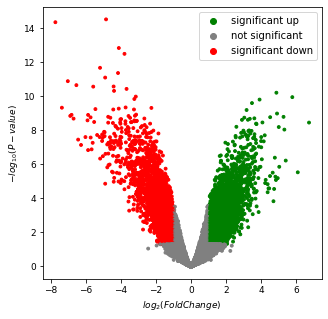

In [ ]:
#GSE14407 Volcanic Plot
from bioinfokit import analys, visuz
visuz.GeneExpression.volcano(df=gsel, lfc='logFC', pv='P.Value', ar = 0, show = True, plotlegend = True,legendpos = 'upper right')

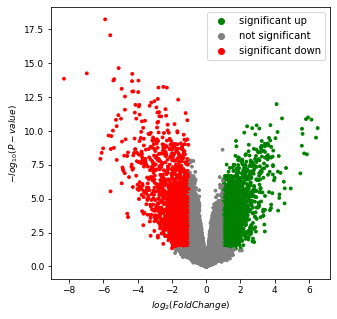

In [ ]:
#GSE54388 Volcanic Plot
from bioinfokit import analys, visuz
visuz.GeneExpression.volcano(df=gsell, lfc='logFC', pv='P.Value', ar = 0, show = True, plotlegend = True,legendpos = 'upper right')

2) Pairplots are used to show relationships and make comparisons between variables in a datasets.Inorder to plot the pairplots for both microarray datasets, first indices are set for the datasets, the datasets normalized and then the values are duplicated into new datasets. Only the top 200 Differentially Expressed Genes (DEGs) are plotted and taken as candidate genes.

In [ ]:
!pip install json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [ ]:
gsell.describe()

,adj.P.Val,P.Value,t,B,logFC
count,4.511800e+04,4.511800e+04,45118.000000,45118.000000,45118.000000
mean,4.832721e-01,3.366113e-01,0.298584,-4.908293,0.076403
std,3.423134e-01,3.174554e-01,2.281276,2.954510,0.677412
min,1.640000e-14,5.990000e-19,-28.281483,-6.810094,-8.292561
25%,1.350000e-01,3.320000e-02,-0.762659,-6.666297,-0.129686
50%,4.990000e-01,2.440000e-01,0.352679,-6.094354,0.052690
75%,8.110000e-01,6.020000e-01,1.549609,-4.421124,0.307867
max,1.000000e+00,1.000000e+00,14.285634,31.033098,6.509277


In [ ]:
gsels = gsel[gsel.columns[[1,2,3,4,5,6]]].set_index('Gene.symbol')
print(gsels)

                           adj.P.Val       P.Value          t          B  \
Gene.symbol                                                                
NELL2                   1.210000e-10  3.000000e-15 -16.414817  23.676705   
LOC101928635///ALDH1A2  1.210000e-10  4.420000e-15 -16.149753  23.352571   
TXNIP                   2.650000e-09  1.450000e-13 -13.910829  20.350954   
ARHGAP18                4.370000e-09  3.190000e-13 -13.442306  19.657861   
EFEMP1                  2.310000e-08  2.110000e-12 -12.366670  17.972142   
...                              ...           ...        ...        ...   
TM2D1                   1.000000e+00  1.000000e+00   0.000219  -6.534291   
TMEM97                  1.000000e+00  1.000000e+00  -0.000211  -6.534291   
COX7B2                  1.000000e+00  1.000000e+00  -0.000203  -6.534291   
MUL1                    1.000000e+00  1.000000e+00   0.000103  -6.534291   
PDCD2                   1.000000e+00  1.000000e+00  -0.000081  -6.534291   

           

In [ ]:
gsels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45118 entries, NELL2 to PDCD2
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj.P.Val  45118 non-null  float64
 1   P.Value    45118 non-null  float64
 2   t          45118 non-null  float64
 3   B          45118 non-null  float64
 4   logFC      45118 non-null  float64
dtypes: float64(5)
memory usage: 2.1+ MB


In [ ]:
gsells = gsell[gsell.columns[[1,2,3,4,5,6]]].set_index('Gene.symbol')
gsells

,adj.P.Val,P.Value,t,B,logFC
Gene.symbol,,,,,
WNT2B,1.640000e-14,5.990000e-19,-28.281483,31.033098,-5.891879
LINC01105,1.620000e-13,8.870000e-18,-24.965454,29.016208,-5.591214
ARX,2.590000e-11,2.370000e-15,-19.208065,24.441167,-5.104444
ABCA8,4.910000e-11,5.770000e-15,-18.411508,23.670782,-6.963283
WNT2B,4.910000e-11,6.290000e-15,-18.335376,23.595074,-4.308057
...,...,...,...,...,...
SMIM4,1.000000e+00,1.000000e+00,0.000138,-6.810094,0.000011
USP42,1.000000e+00,1.000000e+00,-0.000067,-6.810094,-0.000018
FBXL6,1.000000e+00,1.000000e+00,-0.000044,-6.810094,-0.000008


In [ ]:
gses = gsels[~gsels.index.duplicated()]
print(gses)

                           adj.P.Val       P.Value          t          B  \
Gene.symbol                                                                
NELL2                   1.210000e-10  3.000000e-15 -16.414817  23.676705   
LOC101928635///ALDH1A2  1.210000e-10  4.420000e-15 -16.149753  23.352571   
TXNIP                   2.650000e-09  1.450000e-13 -13.910829  20.350954   
ARHGAP18                4.370000e-09  3.190000e-13 -13.442306  19.657861   
EFEMP1                  2.310000e-08  2.110000e-12 -12.366670  17.972142   
...                              ...           ...        ...        ...   
CYTIP                   1.000000e+00  9.990000e-01  -0.000975  -6.534291   
LOC100289361            1.000000e+00  1.000000e+00  -0.000531  -6.534291   
FHOD1                   1.000000e+00  1.000000e+00  -0.000471  -6.534291   
COX7B2                  1.000000e+00  1.000000e+00  -0.000203  -6.534291   
MUL1                    1.000000e+00  1.000000e+00   0.000103  -6.534291   

           

In [ ]:
gses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22189 entries, NELL2 to MUL1
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj.P.Val  22189 non-null  float64
 1   P.Value    22189 non-null  float64
 2   t          22189 non-null  float64
 3   B          22189 non-null  float64
 4   logFC      22189 non-null  float64
dtypes: float64(5)
memory usage: 1.0+ MB


In [ ]:
gsess = gsells[~gsells.index.duplicated()]
print(gsess)

                adj.P.Val       P.Value          t          B     logFC
Gene.symbol                                                            
WNT2B        1.640000e-14  5.990000e-19 -28.281483  31.033098 -5.891879
LINC01105    1.620000e-13  8.870000e-18 -24.965454  29.016208 -5.591214
ARX          2.590000e-11  2.370000e-15 -19.208065  24.441167 -5.104444
ABCA8        4.910000e-11  5.770000e-15 -18.411508  23.670782 -6.963283
ITLN1        9.440000e-11  1.420000e-14 -17.635390  22.881246 -8.292561
...                   ...           ...        ...        ...       ...
ALPP         1.000000e+00  1.000000e+00  -0.000614  -6.810094 -0.000184
LINC01351    1.000000e+00  1.000000e+00  -0.000590  -6.810094 -0.000086
BRINP3       1.000000e+00  1.000000e+00  -0.000479  -6.810094 -0.000031
GALNT11      1.000000e+00  1.000000e+00  -0.000207  -6.810094 -0.000073
NUP210L      1.000000e+00  1.000000e+00   0.000019  -6.810094  0.000003

[22189 rows x 5 columns]


(<seaborn.axisgrid.PairGrid at 0x7f51cc638090>,
           adj.P.Val       P.Value             t             B         logFC
 count  2.218900e+04  2.218900e+04  22189.000000  22189.000000  22189.000000
 mean   2.513829e-01  1.625096e-01      0.796879     -3.738772      0.458208
 std    2.574833e-01  2.335470e-01      2.545349      2.879854      1.158697
 min    1.210000e-10  3.000000e-15    -16.414817     -6.534291     -7.747813
 25%    4.670000e-02  6.470000e-03     -0.558956     -5.751327     -0.244415
 50%    1.590000e-01  5.090000e-02      1.443350     -4.562429      0.705144
 75%    3.810000e-01  2.190000e-01      2.434550     -2.705099      1.199299
 max    1.000000e+00  1.000000e+00     10.598365     23.676705      6.743030)

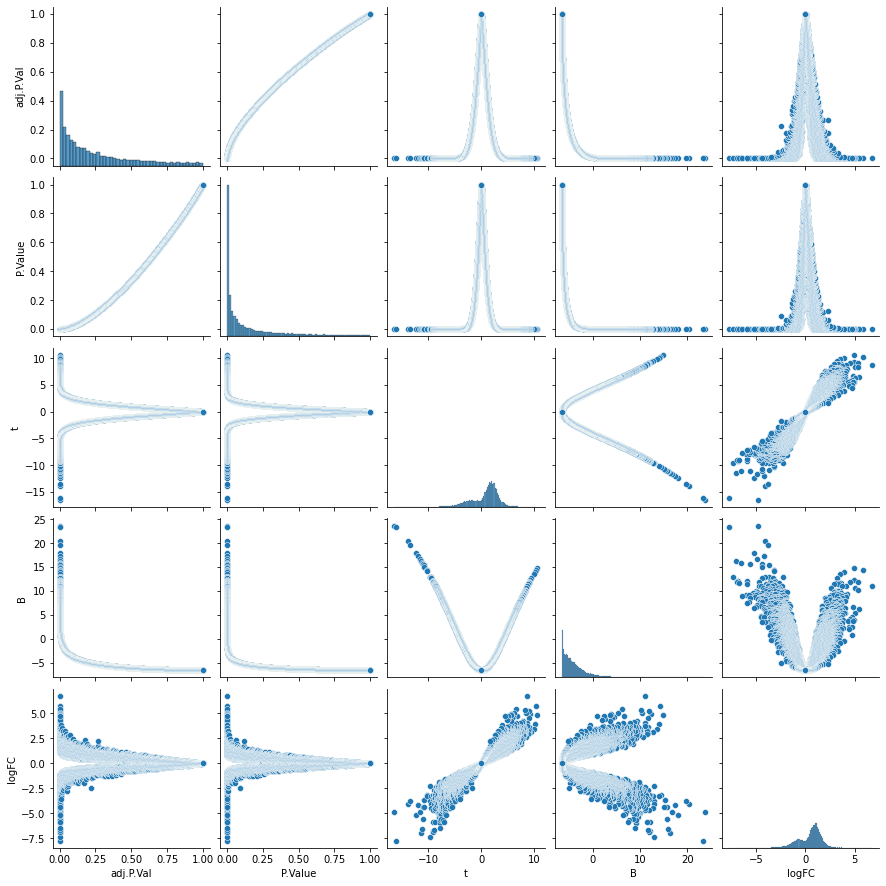

In [ ]:
# Creating a pairplot for all the DEGs in GSE14407
sns.pairplot(gses),gses.describe()

(<seaborn.axisgrid.PairGrid at 0x7f51c96fba90>,
           adj.P.Val       P.Value             t             B         logFC
 count  2.218900e+04  2.218900e+04  22189.000000  22189.000000  22189.000000
 mean   3.799880e-01  2.458835e-01      0.418215     -4.173896      0.113081
 std    3.313625e-01  2.874376e-01      2.733424      3.473137      0.808217
 min    1.640000e-14  5.990000e-19    -28.281483     -6.810094     -8.292561
 25%    5.430000e-02  9.210000e-03     -1.009020     -6.470816     -0.171211
 50%    3.070000e-01  1.120000e-01      0.685170     -5.476989      0.099118
 75%    6.800000e-01  4.230000e-01      2.055914     -3.238978      0.473069
 max    1.000000e+00  1.000000e+00     14.285634     31.033098      6.509277)

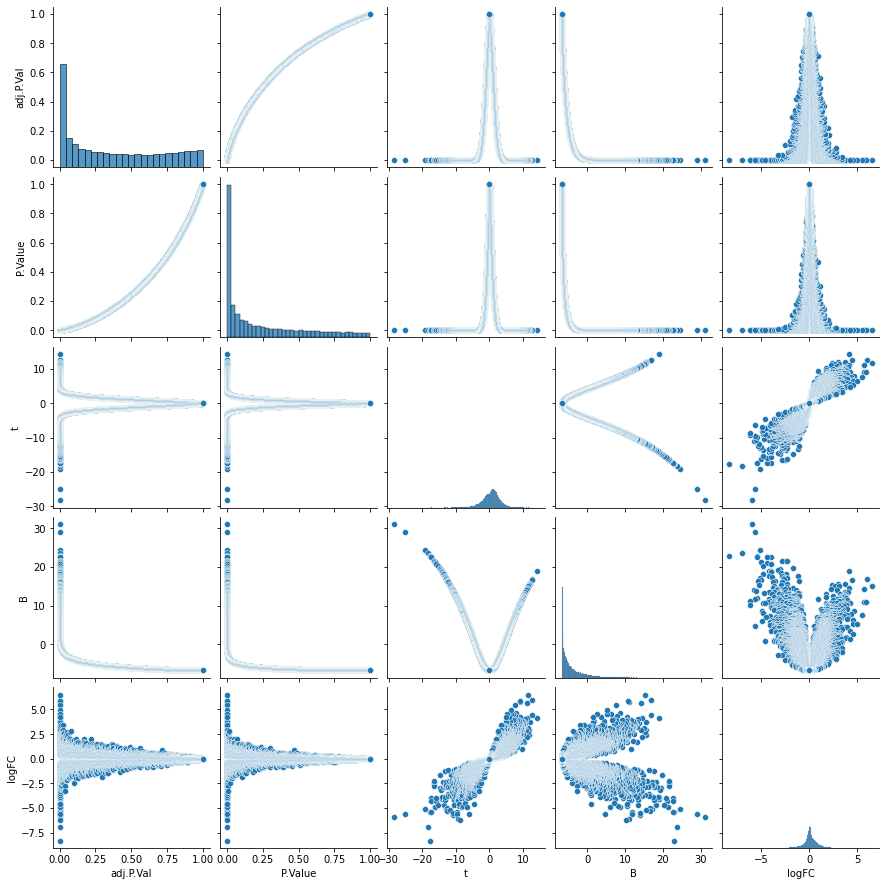

In [ ]:
#  Creating a pairplot for all the DEGs in GSE54388
sns.pairplot(gsess),gsess.describe()

In [ ]:
# Normalizing the data values in GSE14407
gses_normed = gses.copy()
for c in gses.columns:
  col = gses_normed[c]
  gses_normed[c] = col.apply(lambda x:(x - col.mean())/col.std())
print(gses_normed)


                        adj.P.Val   P.Value         t         B     logFC
Gene.symbol                                                              
NELL2                   -0.976308 -0.695832 -6.762018  9.519745 -4.584244
LOC101928635///ALDH1A2  -0.976308 -0.695832 -6.657881  9.407193 -7.082108
TXNIP                   -0.976308 -0.695832 -5.778267  8.364912 -3.954210
ARHGAP18                -0.976308 -0.695832 -5.594197  8.124243 -3.674589
EFEMP1                  -0.976308 -0.695832 -5.171608  7.538894 -4.880366
...                           ...       ...       ...       ...       ...
CYTIP                    2.907440  3.581678 -0.313456 -0.970715 -0.395845
LOC100289361             2.907440  3.585960 -0.313281 -0.970716 -0.395625
FHOD1                    2.907440  3.585960 -0.313258 -0.970716 -0.395631
COX7B2                   2.907440  3.585960 -0.313152 -0.970716 -0.395536
MUL1                     2.907440  3.585960 -0.313032 -0.970716 -0.395421

[22189 rows x 5 columns]


In [ ]:
# Normalizing the data values IN GSE53488
gsess_normed = gsess.copy()
for c in gsess.columns:
  col = gsess_normed[c]
  gsess_normed[c] = col.apply(lambda x:(x - col.mean())/col.std())
print(gsess_normed)


             adj.P.Val   P.Value          t          B      logFC
Gene.symbol                                                      
WNT2B        -1.146744 -0.855433 -10.499543  10.136944  -7.429886
LINC01105    -1.146744 -0.855433  -9.286401   9.556233  -7.057876
ARX          -1.146744 -0.855433  -7.180109   8.238968  -6.455599
ABCA8        -1.146744 -0.855433  -6.888695   8.017155  -8.755524
ITLN1        -1.146744 -0.855433  -6.604759   7.789829 -10.400230
...                ...       ...        ...        ...        ...
ALPP          1.871099  2.623583  -0.153225  -0.759025  -0.140142
LINC01351     1.871099  2.623583  -0.153216  -0.759025  -0.140021
BRINP3        1.871099  2.623583  -0.153176  -0.759025  -0.139952
GALNT11       1.871099  2.623583  -0.153076  -0.759025  -0.140004
NUP210L       1.871099  2.623583  -0.152994  -0.759025  -0.139910

[22189 rows x 5 columns]


In [ ]:
gses_normed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22189 entries, NELL2 to MUL1
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj.P.Val  22189 non-null  float64
 1   P.Value    22189 non-null  float64
 2   t          22189 non-null  float64
 3   B          22189 non-null  float64
 4   logFC      22189 non-null  float64
dtypes: float64(5)
memory usage: 1.0+ MB


In [ ]:
gsess_normed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22189 entries, WNT2B to NUP210L
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj.P.Val  22189 non-null  float64
 1   P.Value    22189 non-null  float64
 2   t          22189 non-null  float64
 3   B          22189 non-null  float64
 4   logFC      22189 non-null  float64
dtypes: float64(5)
memory usage: 1.0+ MB


In [ ]:
gses_top200 = gses_normed.iloc[:200]
print(gses_top200)

                        adj.P.Val   P.Value         t         B     logFC
Gene.symbol                                                              
NELL2                   -0.976308 -0.695832 -6.762018  9.519745 -4.584244
LOC101928635///ALDH1A2  -0.976308 -0.695832 -6.657881  9.407193 -7.082108
TXNIP                   -0.976308 -0.695832 -5.778267  8.364912 -3.954210
ARHGAP18                -0.976308 -0.695832 -5.594197  8.124243 -3.674589
EFEMP1                  -0.976308 -0.695832 -5.171608  7.538894 -4.880366
...                           ...       ...       ...       ...       ...
PDZD3                   -0.976202 -0.695832 -3.146203  3.991609 -3.230555
SNTB1                   -0.976198 -0.695832  2.513878  3.978772  2.140006
MGARP                   -0.976195 -0.695832 -3.135150  3.968639 -4.366209
HSD17B2                 -0.976195 -0.695832 -3.134681  3.967666 -4.217803
CPVL                    -0.976195 -0.695832 -3.132961  3.964087 -2.412410

[200 rows x 5 columns]


In [ ]:
gsess_top200 = gsess_normed.iloc[:200]
print(gsess_top200)

             adj.P.Val   P.Value          t          B      logFC
Gene.symbol                                                      
WNT2B        -1.146744 -0.855433 -10.499543  10.136944  -7.429886
LINC01105    -1.146744 -0.855433  -9.286401   9.556233  -7.057876
ARX          -1.146744 -0.855433  -7.180109   8.238968  -6.455599
ABCA8        -1.146744 -0.855433  -6.888695   8.017155  -8.755524
ITLN1        -1.146744 -0.855433  -6.604759   7.789829 -10.400230
...                ...       ...        ...        ...        ...
GNG11        -1.146739 -0.855432  -3.399351   4.168032  -2.735650
ECT2         -1.146739 -0.855432   3.088443   4.160543   4.557733
WDHD1        -1.146739 -0.855432   3.085773   4.156465   2.229931
ELF3         -1.146739 -0.855432   3.084581   4.154643   4.116040
PTPRN2       -1.146738 -0.855432  -3.375294   4.131247  -2.196196

[200 rows x 5 columns]


3) Dendograms are tree-like diagrams used to visualize qualitative data. It is used to represent hierarchical datasets

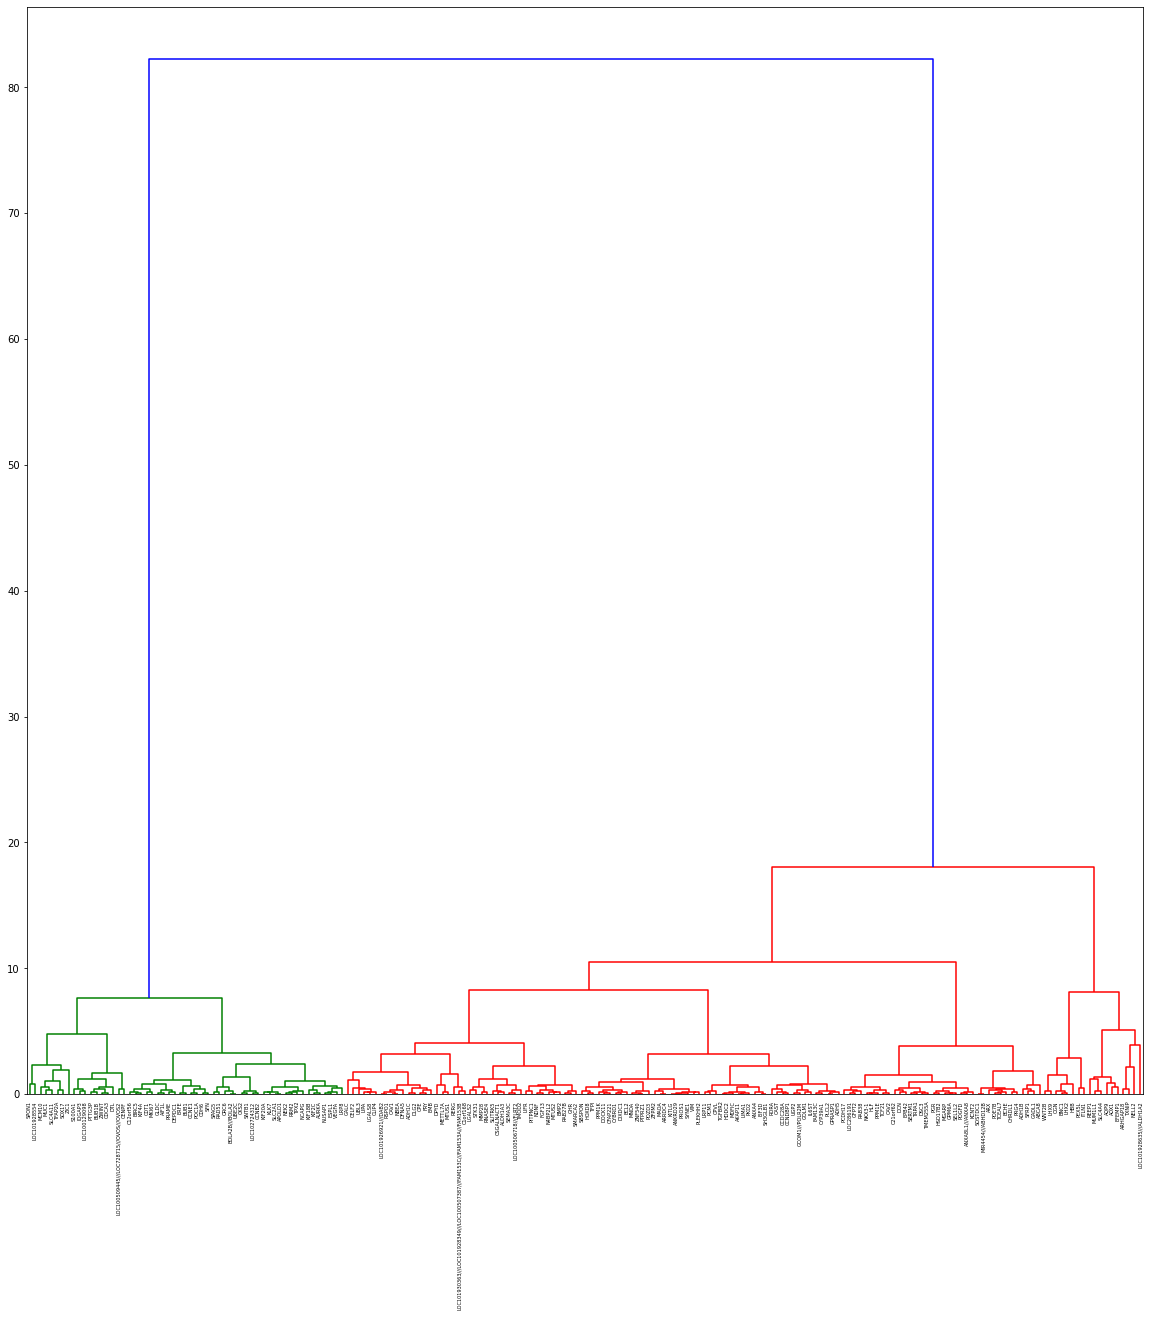

In [ ]:
# Dendogram plotting
plt.figure(figsize = (20,20))
Z = linkage(gses_top200, 'ward', optimal_ordering=True)
R = dendrogram(Z, labels=gses_top200.index)

4) Clustermaps are used to visually represent data points in a dataset.

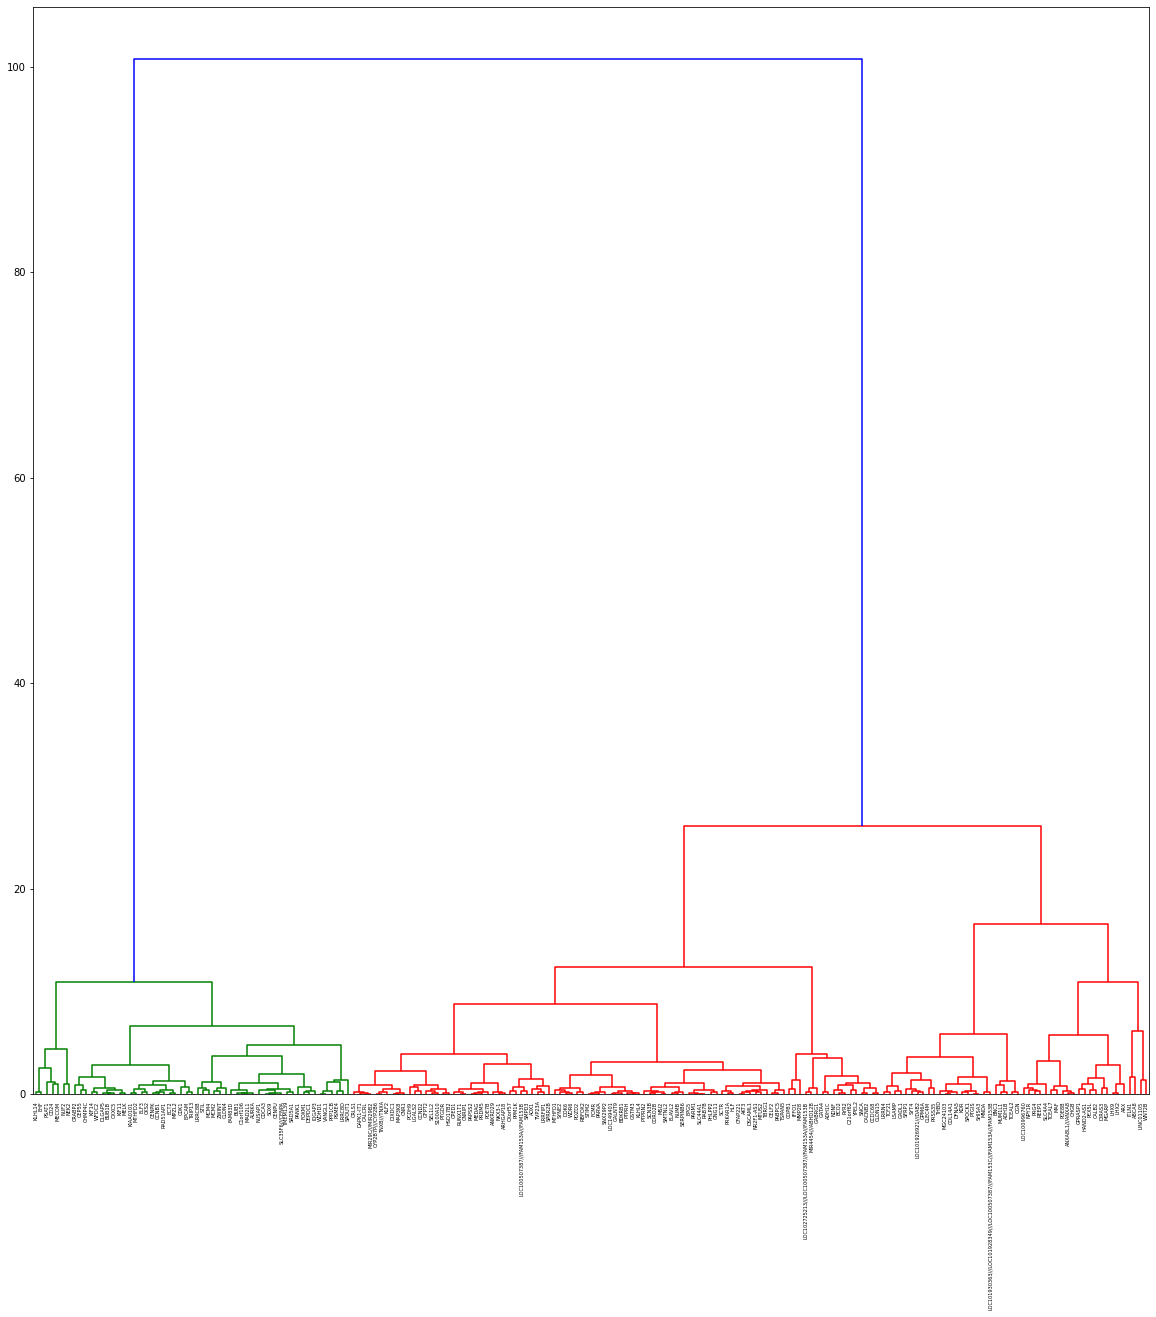

In [ ]:
# Dendogram plotting for GSE54388
plt.figure(figsize = (20,20))
Z = linkage(gsess_top200, 'ward', optimal_ordering=True)
R = dendrogram(Z, labels=gsess_top200.index)

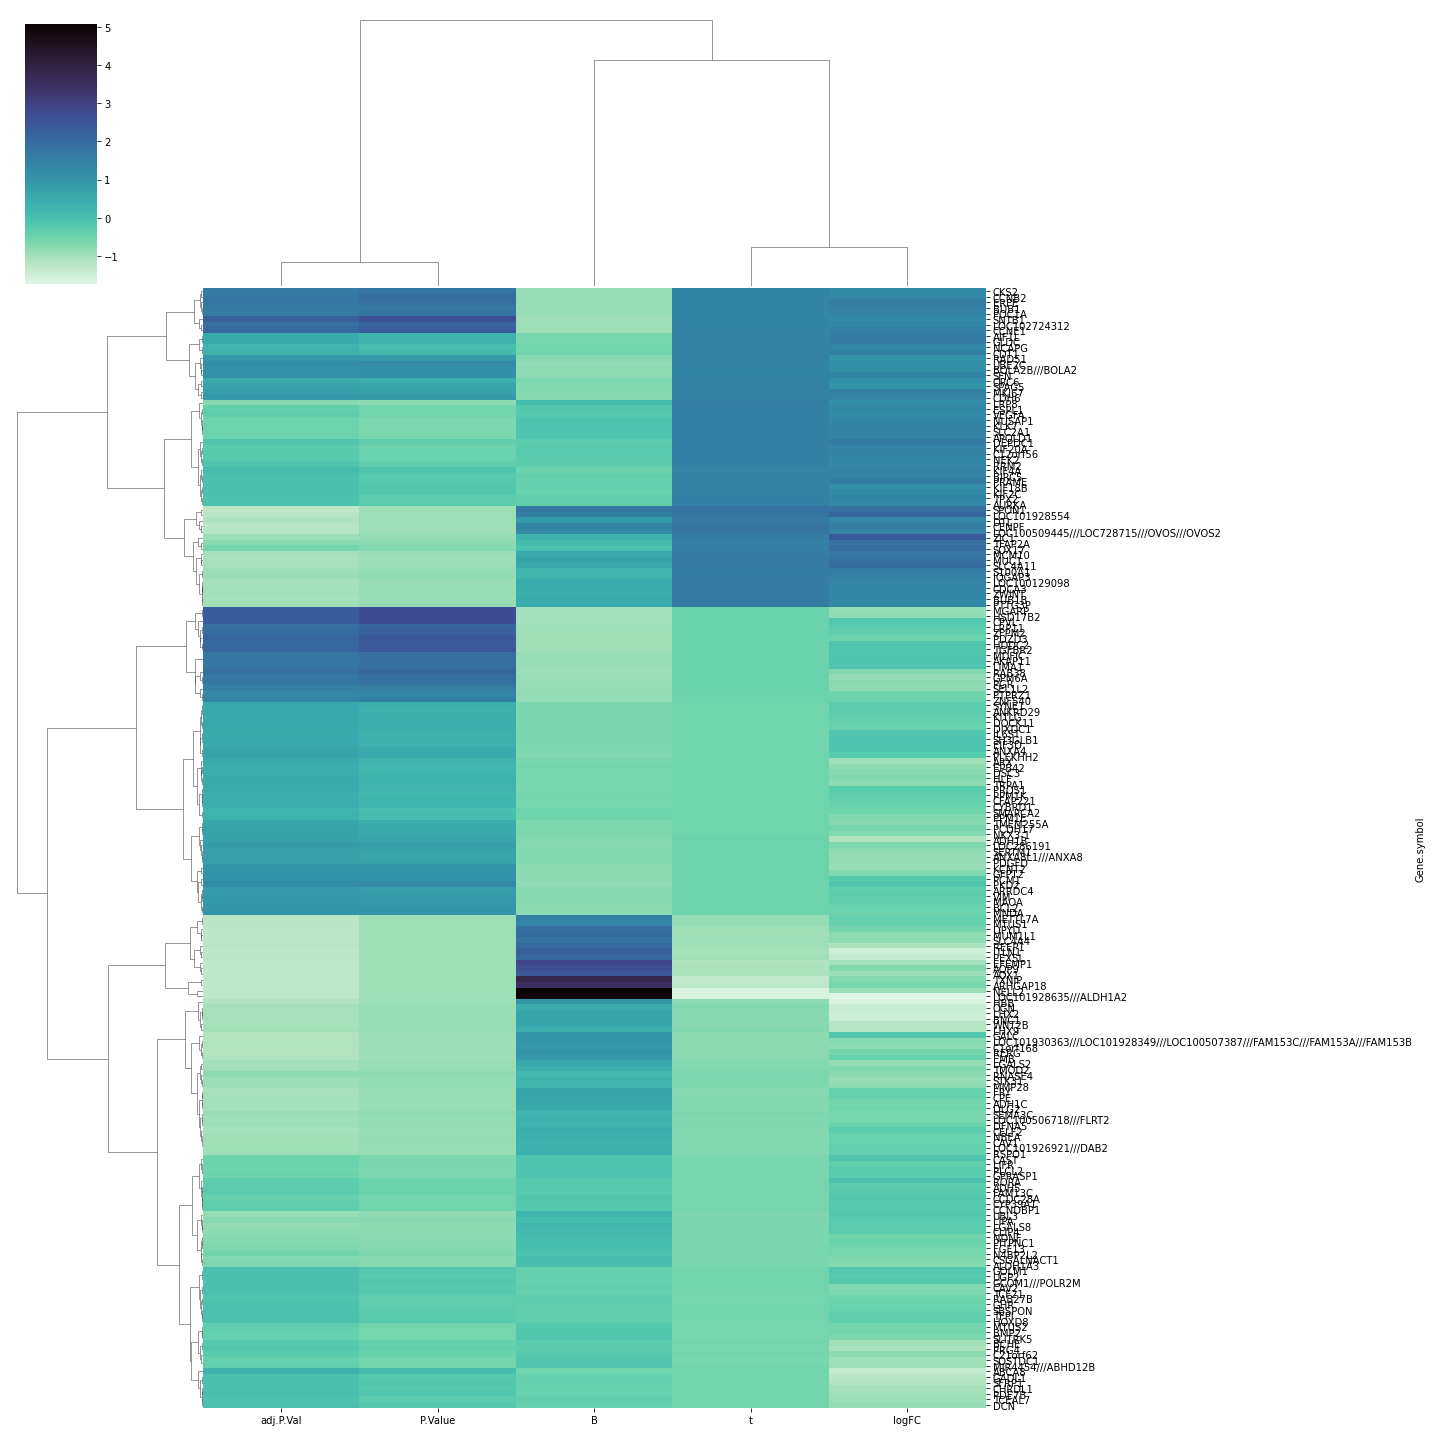

In [ ]:
# Clustermap for GSE14407
clustermap = sns.clustermap(gses_top200, method = 'ward', cmap = 'mako_r', z_score=1, yticklabels=True, figsize=(20, 20))

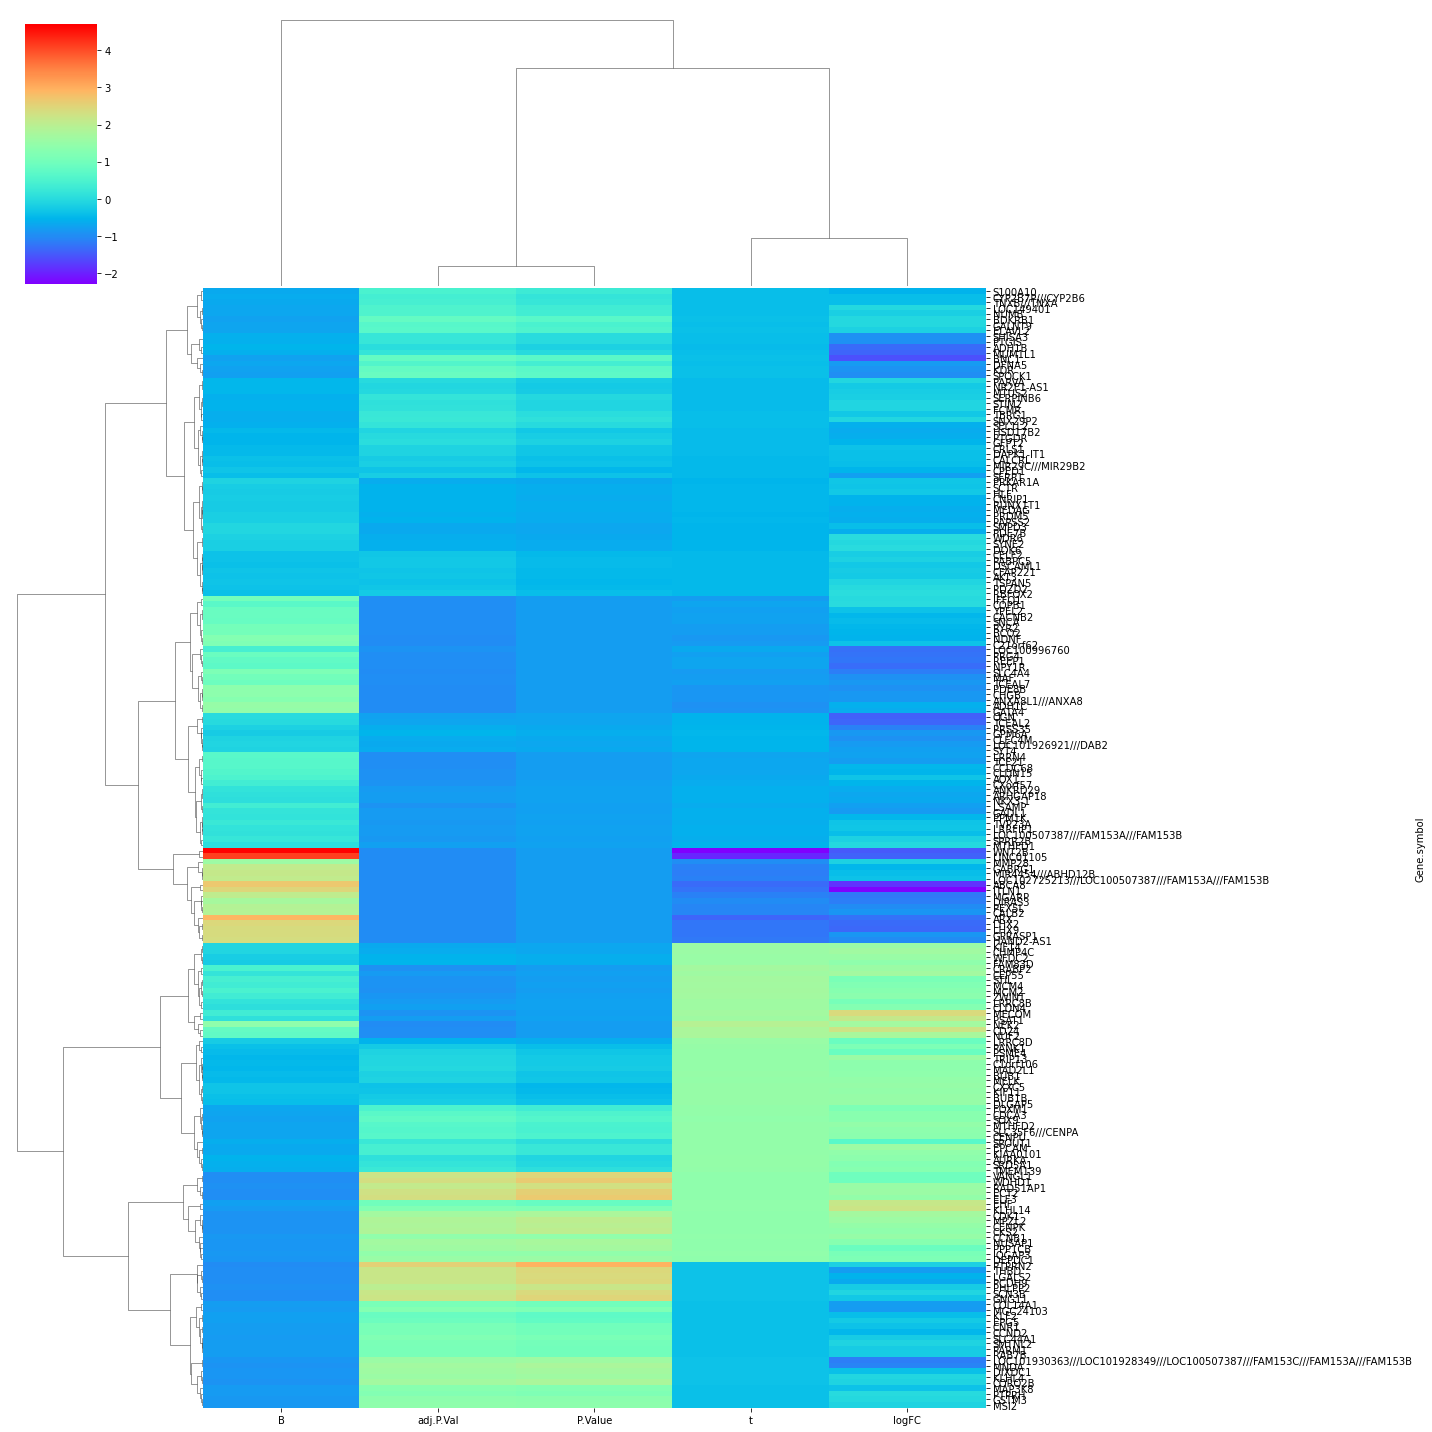

In [ ]:
# Clustermap for GSE53488
clustermap = sns.clustermap(gsess_top200,method = 'ward',cmap = 'rainbow',z_score = 1,yticklabels = True,figsize = (20,20))

CLUSTERING THE DATASETS

Clustering is the process of grouping data points in such a way that those of similar characteristics or those that are more similar fall in the same group, based on homogenity. In this case, it refers to dividing unlabelled datasets into various groups based on homogenity. For these particular datasets, K-Means clustering has been employed.

Preparing Datasets for clustering

In [ ]:
# GSE14407 (gses) and GSE53488 (gsess) Preparation by dropping columns
gses_norm = gses_top200.drop(['t','B'],axis = 1)
gsess_norm = gsess_top200.drop(['t','B'],axis = 1)
print(gses_norm)
print(gsess_norm)

                        adj.P.Val   P.Value     logFC
Gene.symbol                                          
NELL2                   -0.976308 -0.695832 -4.584244
LOC101928635///ALDH1A2  -0.976308 -0.695832 -7.082108
TXNIP                   -0.976308 -0.695832 -3.954210
ARHGAP18                -0.976308 -0.695832 -3.674589
EFEMP1                  -0.976308 -0.695832 -4.880366
...                           ...       ...       ...
PDZD3                   -0.976202 -0.695832 -3.230555
SNTB1                   -0.976198 -0.695832  2.140006
MGARP                   -0.976195 -0.695832 -4.366209
HSD17B2                 -0.976195 -0.695832 -4.217803
CPVL                    -0.976195 -0.695832 -2.412410

[200 rows x 3 columns]
             adj.P.Val   P.Value      logFC
Gene.symbol                                
WNT2B        -1.146744 -0.855433  -7.429886
LINC01105    -1.146744 -0.855433  -7.057876
ARX          -1.146744 -0.855433  -6.455599
ABCA8        -1.146744 -0.855433  -8.755524
ITLN1     

In [ ]:
gsesf = gses_norm.drop(['logFC'],axis = 1)
gsessf = gsess_norm.drop(['logFC'],axis = 1)
print(gsesf)
print(gsessf)

                        adj.P.Val   P.Value
Gene.symbol                                
NELL2                   -0.976308 -0.695832
LOC101928635///ALDH1A2  -0.976308 -0.695832
TXNIP                   -0.976308 -0.695832
ARHGAP18                -0.976308 -0.695832
EFEMP1                  -0.976308 -0.695832
...                           ...       ...
PDZD3                   -0.976202 -0.695832
SNTB1                   -0.976198 -0.695832
MGARP                   -0.976195 -0.695832
HSD17B2                 -0.976195 -0.695832
CPVL                    -0.976195 -0.695832

[200 rows x 2 columns]
             adj.P.Val   P.Value
Gene.symbol                     
WNT2B        -1.146744 -0.855433
LINC01105    -1.146744 -0.855433
ARX          -1.146744 -0.855433
ABCA8        -1.146744 -0.855433
ITLN1        -1.146744 -0.855433
...                ...       ...
GNG11        -1.146739 -0.855432
ECT2         -1.146739 -0.855432
WDHD1        -1.146739 -0.855432
ELF3         -1.146739 -0.855432
PTPRN2  

In [ ]:
gsesf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, NELL2 to CPVL
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj.P.Val  200 non-null    float64
 1   P.Value    200 non-null    float64
dtypes: float64(2)
memory usage: 4.7+ KB


Visualizing in Python

Protein-Protein Networks

The protein-protein networks are used to visualize the interaction between the genes.

In [ ]:
!pip install git+https://github.com/cytoscape/py2cytoscape.git --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cytoscape/py2cytoscape.git to /tmp/pip-req-build-jsg6b9c8
  Running command git clone -q https://github.com/cytoscape/py2cytoscape.git /tmp/pip-req-build-jsg6b9c8
  Created wheel for py2cytoscape: filename=py2cytoscape-0.7.1-py3-none-any.whl size=89671 sha256=f8a27f61c75d095dbfd717cf7c0f137704b05f51ed955f4869278ad35f88929c
  Stored in directory: /tmp/pip-ephem-wheel-cache-1pmb2ohb/wheels/ec/c9/91/8ae7ecce2119d194d37bece19790d567124327656c5a605d59
Successfully built py2cytoscape


In [ ]:
import networkx as nx
from matplotlib import cm

In [ ]:
df1 = pd.DataFrame(gse1,columns = ['Gene.symbol'])
print(df1)
df2 = df1.iloc[:200]
GL1 = df2['Gene.symbol'].to_list()
print(GL1)

                  Gene.symbol
0                       NELL2
1      LOC101928635///ALDH1A2
2                       TXNIP
3                    ARHGAP18
4                      EFEMP1
...                       ...
54670                   TM2D1
54671                  TMEM97
54672                  COX7B2
54673                    MUL1
54674                   PDCD2

[54675 rows x 1 columns]
['NELL2', 'LOC101928635///ALDH1A2', 'TXNIP', 'ARHGAP18', 'EFEMP1', 'AQP9', 'AOX1', 'ITLN1', 'PEX5L', 'MUM1L1', 'REEP1', 'DPYD', 'SLC4A4', 'SPON1', 'METTL7A', 'LOC101928554', 'MTUS1', nan, 'CENPF', 'LOC100509445///LOC728715///OVOS///OVOS2', 'RERG', 'HBB', 'GALC', 'LOC101930363///LOC101928349///LOC100507387///FAM153C///FAM153A///FAM153B', 'EFEMP1', 'EMB', 'C1orf168', 'DTL', 'MUC1', 'FRY', 'LHX2', 'WNT2B', 'CPE', 'BNC1', 'ADH1C', nan, 'LGALS2', 'SLC4A11', 'MCM10', 'HBB', nan, 'BUB1B', 'PEX5L', 'DLG2', 'LOC100129098', 'CELF2', 'OGN', 'CDCA3', 'ARHGAP18', 'TMOD2', 'ZWINT', 'PTTG3P', 'LHX9', 'NBEA', 'LOC101926921

In [ ]:
L = GL1
L1 = []
for i in range(0, len(L),2):
  L1.append((L[i], L[i+1]))

print(L1)

[('NELL2', 'LOC101928635///ALDH1A2'), ('TXNIP', 'ARHGAP18'), ('EFEMP1', 'AQP9'), ('AOX1', 'ITLN1'), ('PEX5L', 'MUM1L1'), ('REEP1', 'DPYD'), ('SLC4A4', 'SPON1'), ('METTL7A', 'LOC101928554'), ('MTUS1', nan), ('CENPF', 'LOC100509445///LOC728715///OVOS///OVOS2'), ('RERG', 'HBB'), ('GALC', 'LOC101930363///LOC101928349///LOC100507387///FAM153C///FAM153A///FAM153B'), ('EFEMP1', 'EMB'), ('C1orf168', 'DTL'), ('MUC1', 'FRY'), ('LHX2', 'WNT2B'), ('CPE', 'BNC1'), ('ADH1C', nan), ('LGALS2', 'SLC4A11'), ('MCM10', 'HBB'), (nan, 'BUB1B'), ('PEX5L', 'DLG2'), ('LOC100129098', 'CELF2'), ('OGN', 'CDCA3'), ('ARHGAP18', 'TMOD2'), ('ZWINT', 'PTTG3P'), ('LHX9', 'NBEA'), ('LOC101926921///DAB2', 'RSPO1'), ('LOC100506718///FLRT2', 'CAV1'), ('WNT2B', 'CELF2'), ('DFNA5', 'ARHGAP18'), ('S100A1', 'ZIC1'), ('STK31', 'MMP28'), ('IQGAP3', 'UBL3'), ('REEP1', 'SEMA3C'), ('SPON1', 'LGALS8'), ('RNASE4', 'CLIP4'), ('SLC4A4', 'LRP8'), ('NDNF', 'TFAP2A'), ('LIPA', 'CPE'), ('CSGALNACT1', 'PITPNC1'), ('FGF13', 'ALDH1A3'), ('SOX

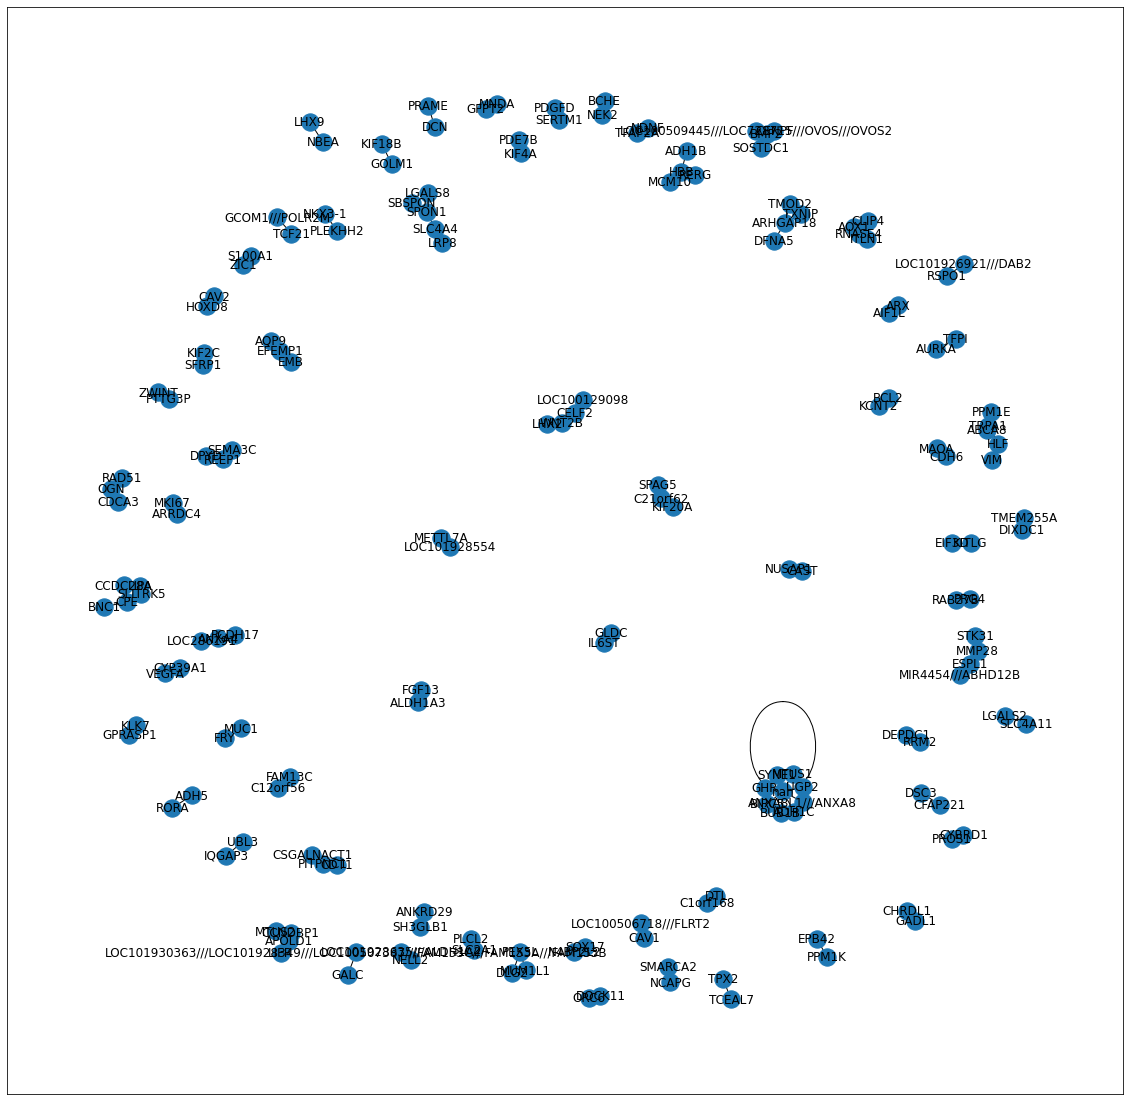

In [ ]:
plt.figure(figsize = (20,20))
G=nx.Graph(name='Protein Interaction Graph')
G.add_nodes_from(GL1)
G.add_edges_from(L1)
nx.draw_networkx(G)

In [ ]:
G.nodes()

NodeView(('NELL2', 'LOC101928635///ALDH1A2', 'TXNIP', 'ARHGAP18', 'EFEMP1', 'AQP9', 'AOX1', 'ITLN1', 'PEX5L', 'MUM1L1', 'REEP1', 'DPYD', 'SLC4A4', 'SPON1', 'METTL7A', 'LOC101928554', 'MTUS1', nan, 'CENPF', 'LOC100509445///LOC728715///OVOS///OVOS2', 'RERG', 'HBB', 'GALC', 'LOC101930363///LOC101928349///LOC100507387///FAM153C///FAM153A///FAM153B', 'EMB', 'C1orf168', 'DTL', 'MUC1', 'FRY', 'LHX2', 'WNT2B', 'CPE', 'BNC1', 'ADH1C', 'LGALS2', 'SLC4A11', 'MCM10', 'BUB1B', 'DLG2', 'LOC100129098', 'CELF2', 'OGN', 'CDCA3', 'TMOD2', 'ZWINT', 'PTTG3P', 'LHX9', 'NBEA', 'LOC101926921///DAB2', 'RSPO1', 'LOC100506718///FLRT2', 'CAV1', 'DFNA5', 'S100A1', 'ZIC1', 'STK31', 'MMP28', 'IQGAP3', 'UBL3', 'SEMA3C', 'LGALS8', 'RNASE4', 'CLIP4', 'LRP8', 'NDNF', 'TFAP2A', 'LIPA', 'CSGALNACT1', 'PITPNC1', 'FGF13', 'ALDH1A3', 'SOX17', 'N4BP2L2', 'PLCL2', 'SLC2A1', 'CAST', 'NUSAP1', 'GPRASP1', 'KLK7', 'APOLD1', 'LIFR', 'SOSTDC1', 'BMP2', 'SLITRK5', 'CCDC28A', 'MIR4454///ABHD12B', 'ESPL1', 'CYP39A1', 'VEGFA', 'CCNDBP1

In [ ]:
G.edges()

EdgeView([('NELL2', 'LOC101928635///ALDH1A2'), ('TXNIP', 'ARHGAP18'), ('ARHGAP18', 'TMOD2'), ('ARHGAP18', 'DFNA5'), ('EFEMP1', 'AQP9'), ('EFEMP1', 'EMB'), ('AOX1', 'ITLN1'), ('PEX5L', 'MUM1L1'), ('PEX5L', 'DLG2'), ('REEP1', 'DPYD'), ('REEP1', 'SEMA3C'), ('SLC4A4', 'SPON1'), ('SLC4A4', 'LRP8'), ('SPON1', 'LGALS8'), ('SPON1', 'SBSPON'), ('METTL7A', 'LOC101928554'), ('MTUS1', nan), (nan, 'ADH1C'), (nan, 'BUB1B'), (nan, 'GHR'), (nan, 'UGP2'), (nan, 'BIRC5'), (nan, nan), (nan, 'SYNE1'), (nan, 'ANXA8L1///ANXA8'), ('CENPF', 'LOC100509445///LOC728715///OVOS///OVOS2'), ('RERG', 'HBB'), ('HBB', 'MCM10'), ('HBB', 'ADH1B'), ('GALC', 'LOC101930363///LOC101928349///LOC100507387///FAM153C///FAM153A///FAM153B'), ('C1orf168', 'DTL'), ('MUC1', 'FRY'), ('LHX2', 'WNT2B'), ('WNT2B', 'CELF2'), ('CPE', 'BNC1'), ('CPE', 'LIPA'), ('LGALS2', 'SLC4A11'), ('LOC100129098', 'CELF2'), ('OGN', 'CDCA3'), ('OGN', 'RAD51'), ('ZWINT', 'PTTG3P'), ('LHX9', 'NBEA'), ('LOC101926921///DAB2', 'RSPO1'), ('LOC100506718///FLRT2',

In [ ]:
print(nx.info(G))

Graph named 'Protein Interaction Graph' with 171 nodes and 100 edges


In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.0068799449604403165


In [ ]:
df3 = pd.DataFrame(gse2,columns = ['Gene.symbol'])
print(df3)
df4 = df3.iloc[:200]
GL2 = df3['Gene.symbol'].to_list()
print(GL2)

      Gene.symbol
0             NaN
1           WNT2B
2       LINC01105
3             NaN
4             ARX
...           ...
54670       USP42
54671         NaN
54672       FBXL6
54673     NUP210L
54674       GNAO1

[54675 rows x 1 columns]
[nan, 'WNT2B', 'LINC01105', nan, 'ARX', 'ABCA8', 'WNT2B', 'ITLN1', 'LHX2', 'LHX9', 'GPRASP1', 'HAND2-AS1', 'MIR4454///ABHD12B', 'GABRG1', 'LOC102725213///LOC100507387///FAM153A///FAM153B', 'MGARP', 'LINC01105', 'PEX5L', 'CALB2', nan, 'DIRAS3', nan, 'LINC01105', 'MMP28', 'ADH1C', 'GATA4', 'NEK2', 'PDE8B', 'CHGB', 'PDE8B', 'ANXA8L1///ANXA8', 'NDNF', 'C21orf62', 'SLC4A4', 'RYR2', 'BCO2', 'MAF', 'IFFO1', 'TCEAL7', 'PRG4', 'YPEL2', 'CACNB2', 'SNCA', 'CD24', 'NUF2', 'WNT2B', 'REEP1', 'CD24', 'CD24', 'NPY1R', 'COPB1', 'LRRN4', 'TCF21', 'CCDC68', 'CLDN15', nan, 'TCF21', 'AOX1', 'CRABP2', 'MCM2', 'LOC100996760', 'STIL', nan, 'CXorf57', 'LSAMP', nan, 'MECOM', 'MCM4', 'ZWINT', 'CD24', 'TVP23A', 'AOX1', 'SPRR2B', 'GADL1', 'CEP55', 'PPM1K', 'PEX5L', 'LRRC8B', '

In [ ]:
L3 = GL2
L4 = []
for i in range(1,len(L3),2):
  L4.append((L3[i], L3[i+1]))

print(L4)

[('WNT2B', 'LINC01105'), (nan, 'ARX'), ('ABCA8', 'WNT2B'), ('ITLN1', 'LHX2'), ('LHX9', 'GPRASP1'), ('HAND2-AS1', 'MIR4454///ABHD12B'), ('GABRG1', 'LOC102725213///LOC100507387///FAM153A///FAM153B'), ('MGARP', 'LINC01105'), ('PEX5L', 'CALB2'), (nan, 'DIRAS3'), (nan, 'LINC01105'), ('MMP28', 'ADH1C'), ('GATA4', 'NEK2'), ('PDE8B', 'CHGB'), ('PDE8B', 'ANXA8L1///ANXA8'), ('NDNF', 'C21orf62'), ('SLC4A4', 'RYR2'), ('BCO2', 'MAF'), ('IFFO1', 'TCEAL7'), ('PRG4', 'YPEL2'), ('CACNB2', 'SNCA'), ('CD24', 'NUF2'), ('WNT2B', 'REEP1'), ('CD24', 'CD24'), ('NPY1R', 'COPB1'), ('LRRN4', 'TCF21'), ('CCDC68', 'CLDN15'), (nan, 'TCF21'), ('AOX1', 'CRABP2'), ('MCM2', 'LOC100996760'), ('STIL', nan), ('CXorf57', 'LSAMP'), (nan, 'MECOM'), ('MCM4', 'ZWINT'), ('CD24', 'TVP23A'), ('AOX1', 'SPRR2B'), ('GADL1', 'CEP55'), ('PPM1K', 'PEX5L'), ('LRRC8B', 'LRRFIP1'), ('ANKRD29', nan), (nan, 'LOC100507387///FAM153A///FAM153B'), (nan, 'PSAT1'), ('ARHGAP18', 'NKX3-1'), ('CLDN4', nan), ('MTHFD1', 'OGN'), ('TCEAL2', nan), (nan, 

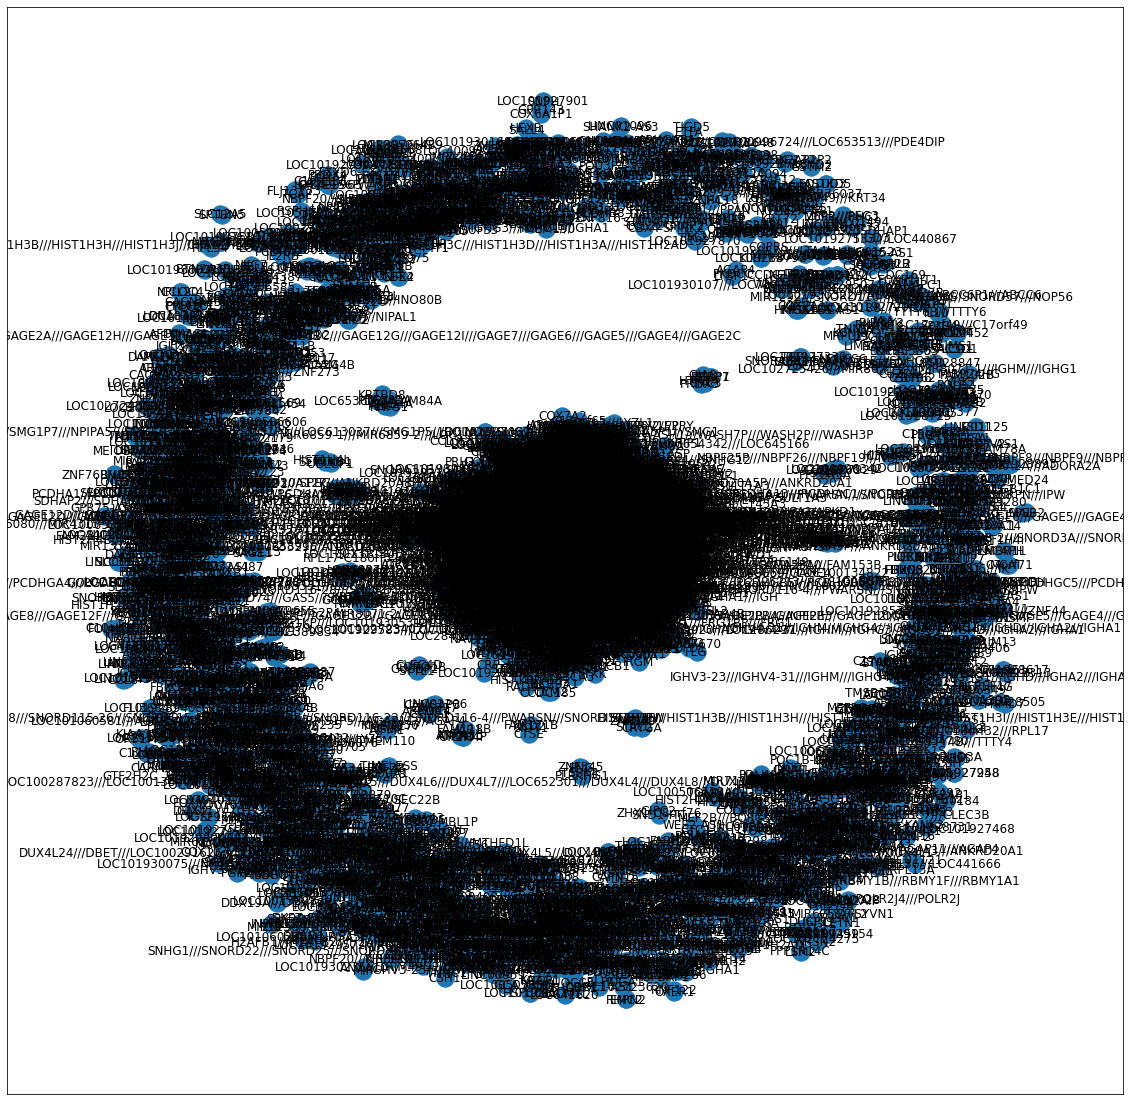

In [ ]:
plt.figure(figsize = (20,20))
G1 = nx.Graph(name = 'Protein Protein Interaction Graph')
G1.add_nodes_from(GL2)
G1.add_edges_from(L4)
nx.draw_networkx(G1)

In [ ]:
print(nx.info(G1))

Graph named 'Protein Protein Interaction Graph' with 22190 nodes and 25288 edges


In [ ]:
# Sorting the Datasets
sorted14 = gsesf.sort_values(by = ['P.Value'])
sorted53 = gsessf.sort_values(by = ['P.Value'])
print(sorted14)
print(sorted53)

                        adj.P.Val   P.Value
Gene.symbol                                
NELL2                   -0.976308 -0.695832
LOC101928635///ALDH1A2  -0.976308 -0.695832
TXNIP                   -0.976308 -0.695832
ARHGAP18                -0.976308 -0.695832
EFEMP1                  -0.976308 -0.695832
...                           ...       ...
PDZD3                   -0.976202 -0.695832
SNTB1                   -0.976198 -0.695832
MGARP                   -0.976195 -0.695832
HSD17B2                 -0.976195 -0.695832
CPVL                    -0.976195 -0.695832

[200 rows x 2 columns]
             adj.P.Val   P.Value
Gene.symbol                     
WNT2B        -1.146744 -0.855433
LINC01105    -1.146744 -0.855433
ARX          -1.146744 -0.855433
ABCA8        -1.146744 -0.855433
ITLN1        -1.146744 -0.855433
...                ...       ...
GNG11        -1.146739 -0.855432
ECT2         -1.146739 -0.855432
WDHD1        -1.146739 -0.855432
ELF3         -1.146739 -0.855432
PTPRN2  

PCA ANALYSIS

Principal Component Analysis (PCA) refers to a dimensionality reduction technique used to reduce the dimensionality of large datasets by only selecting the relevant dimensions.

GSE14407

In [ ]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
data_scaler.fit(gses_normed)
scaled_data_frame = data_scaler.transform(gses_normed)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data_frame)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform(scaled_data_frame)

print(x_pca.shape)

print(scaled_data_frame.shape)

(22189, 2)
(22189, 5)


Text(0, 0.5, 'Second Principal Component')

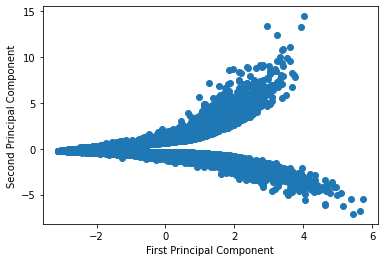

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1])

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

GSE54388

In [ ]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
data_scaler.fit(gsess_normed)
scaled_data_frame = data_scaler.transform(gsess_normed)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data_frame)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform(scaled_data_frame)

print(x_pca.shape)

print(scaled_data_frame.shape)

(22189, 2)
(22189, 5)


Text(0, 0.5, 'Second Principal Component')

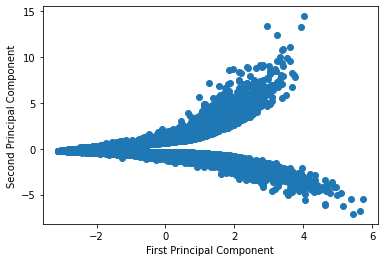

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1])

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

K-Means Clustering

GSE14407

In [ ]:
# Identifying the necessary Variable (P.Value) for GSE14407
x = gses_normed.iloc[:,1]
print(x)
X = pd.DataFrame(x)

Gene.symbol
NELL2                    -0.695832
LOC101928635///ALDH1A2   -0.695832
TXNIP                    -0.695832
ARHGAP18                 -0.695832
EFEMP1                   -0.695832
                            ...   
CYTIP                     3.581678
LOC100289361              3.585960
FHOD1                     3.585960
COX7B2                    3.585960
MUL1                      3.585960
Name: P.Value, Length: 22189, dtype: float64


In [ ]:
Y = gses_normed.iloc[:,0]
print(Y)
y = pd.DataFrame(Y)

Gene.symbol
NELL2                    -0.976308
LOC101928635///ALDH1A2   -0.976308
TXNIP                    -0.976308
ARHGAP18                 -0.976308
EFEMP1                   -0.976308
                            ...   
CYTIP                     2.907440
LOC100289361              2.907440
FHOD1                     2.907440
COX7B2                    2.907440
MUL1                      2.907440
Name: adj.P.Val, Length: 22189, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-0.51851683],
       [ 2.51632743],
       [ 0.73708792]])

In [ ]:
kmeans.n_iter_

8

In [ ]:
X['Label'] = kmeans.fit_predict(X[['P.Value']])
print(X)

                         P.Value  Label
Gene.symbol                            
NELL2                  -0.695832      0
LOC101928635///ALDH1A2 -0.695832      0
TXNIP                  -0.695832      0
ARHGAP18               -0.695832      0
EFEMP1                 -0.695832      0
...                          ...    ...
CYTIP                   3.581678      1
LOC100289361            3.585960      1
FHOD1                   3.585960      1
COX7B2                  3.585960      1
MUL1                    3.585960      1

[22189 rows x 2 columns]


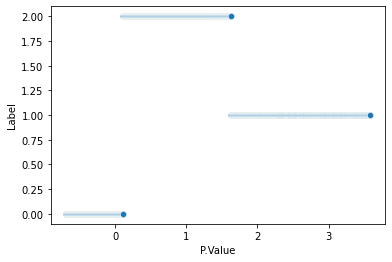

In [ ]:
sns.scatterplot(x = 'P.Value',y = 'Label',data = X)

In [ ]:
print(X)
X.shape

                         P.Value  Label
Gene.symbol                            
NELL2                  -0.695832      0
LOC101928635///ALDH1A2 -0.695832      0
TXNIP                  -0.695832      0
ARHGAP18               -0.695832      0
EFEMP1                 -0.695832      0
...                          ...    ...
CYTIP                   3.581678      1
LOC100289361            3.585960      1
FHOD1                   3.585960      1
COX7B2                  3.585960      1
MUL1                    3.585960      1

[22189 rows x 2 columns]


(22189, 2)

Text(0, 0.5, 'WCSS')

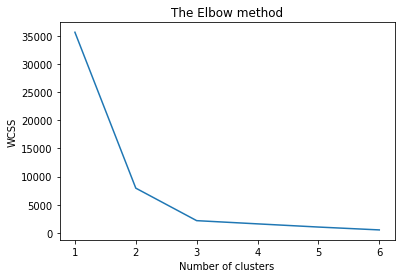

In [ ]:
# Finding Optimal number of Clusters for GSE14407
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
 kmeans = KMeans(i)
 kmeans.fit(X)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-5.17969953e-01, -1.69864123e-14],
       [ 7.41069309e-01,  2.00000000e+00],
       [ 2.51967709e+00,  1.00000000e+00]])

In [ ]:
kmeans.n_iter_

4

In [ ]:
X['label'] = kmeans.fit_predict(X[['P.Value']])
print(X)

                         P.Value  Label  label
Gene.symbol                                   
NELL2                  -0.695832      0      0
LOC101928635///ALDH1A2 -0.695832      0      0
TXNIP                  -0.695832      0      0
ARHGAP18               -0.695832      0      0
EFEMP1                 -0.695832      0      0
...                          ...    ...    ...
CYTIP                   3.581678      1      1
LOC100289361            3.585960      1      1
FHOD1                   3.585960      1      1
COX7B2                  3.585960      1      1
MUL1                    3.585960      1      1

[22189 rows x 3 columns]


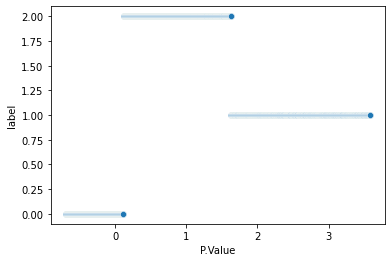

In [ ]:
sns.scatterplot(x = 'P.Value',y = 'label',data = X)

Silhoutte score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, identified_clusters)
print(score)

0.8791804077411024


GSE54388

In [ ]:
# Identifying the necessary Variable (P.Value) for GSE53488
X = gsess_normed.iloc[:,1]
print(X)
x = pd.DataFrame(X)

Gene.symbol
WNT2B       -0.855433
LINC01105   -0.855433
ARX         -0.855433
ABCA8       -0.855433
ITLN1       -0.855433
               ...   
ALPP         2.623583
LINC01351    2.623583
BRINP3       2.623583
GALNT11      2.623583
NUP210L      2.623583
Name: P.Value, Length: 22189, dtype: float64


In [ ]:
print(x)
x.shape

              P.Value
Gene.symbol          
WNT2B       -0.855433
LINC01105   -0.855433
ARX         -0.855433
ABCA8       -0.855433
ITLN1       -0.855433
...               ...
ALPP         2.623583
LINC01351    2.623583
BRINP3       2.623583
GALNT11      2.623583
NUP210L      2.623583

[22189 rows x 1 columns]


(22189, 1)

In [ ]:
y = gses_normed.iloc[:,0]
print(y)
Y = pd.DataFrame(y)

Gene.symbol
NELL2                    -0.976308
LOC101928635///ALDH1A2   -0.976308
TXNIP                    -0.976308
ARHGAP18                 -0.976308
EFEMP1                   -0.976308
                            ...   
CYTIP                     2.907440
LOC100289361              2.907440
FHOD1                     2.907440
COX7B2                    2.907440
MUL1                      2.907440
Name: adj.P.Val, Length: 22189, dtype: float64


Text(0, 0.5, 'WCSS')

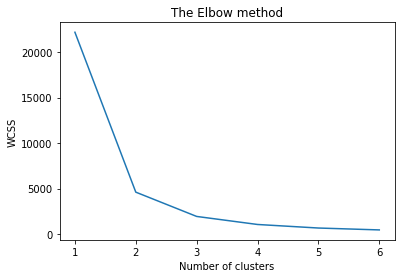

In [ ]:
# Finding Optimal number of Clusters for GSE53488
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size = 0.2,random_state = 0)

In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-0.68644461],
       [ 1.85497808],
       [ 0.47024309]])

In [ ]:
kmeans.n_iter_

4

In [ ]:
x['labels'] = kmeans.fit_predict(x[['P.Value']])
print(x)

              P.Value  labels
Gene.symbol                  
WNT2B       -0.855433       1
LINC01105   -0.855433       1
ARX         -0.855433       1
ABCA8       -0.855433       1
ITLN1       -0.855433       1
...               ...     ...
ALPP         2.623583       0
LINC01351    2.623583       0
BRINP3       2.623583       0
GALNT11      2.623583       0
NUP210L      2.623583       0

[22189 rows x 2 columns]


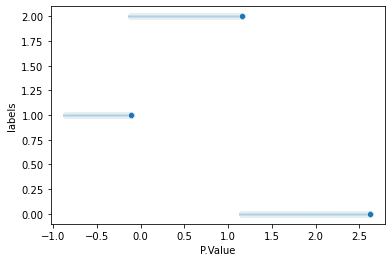

In [ ]:
sns.scatterplot(x = 'P.Value',y = 'labels',data = x)

Performance Metrics

Performance metrics are used to determine how well the clustering technique has performed with respect to the given dataset. For clustering techniques, Silhoutte score shall be used.

Silhoutte Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, identified_clusters)
print(score)

0.8142853026398285


RANDOM FOREST

GSE14407

In [ ]:
x = gses_normed.iloc[:,1]
print(x)
X = pd.DataFrame(x)

Gene.symbol
NELL2                    -0.695832
LOC101928635///ALDH1A2   -0.695832
TXNIP                    -0.695832
ARHGAP18                 -0.695832
EFEMP1                   -0.695832
                            ...   
CYTIP                     3.581678
LOC100289361              3.585960
FHOD1                     3.585960
COX7B2                    3.585960
MUL1                      3.585960
Name: P.Value, Length: 22189, dtype: float64


In [ ]:
Y = gses_normed.iloc[:,0]
print(Y)
y = pd.DataFrame(Y)

Gene.symbol
NELL2                    -0.976308
LOC101928635///ALDH1A2   -0.976308
TXNIP                    -0.976308
ARHGAP18                 -0.976308
EFEMP1                   -0.976308
                            ...   
CYTIP                     2.907440
LOC100289361              2.907440
FHOD1                     2.907440
COX7B2                    2.907440
MUL1                      2.907440
Name: adj.P.Val, Length: 22189, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Performance Metrics

Performance metrics are used to determine how well the random forest technique has performed with respect to the given dataset.

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0005985100280374825
Mean Squared Error: 1.2124286579919068e-06
Root Mean Squared Error: 0.0011011033820636038


GSE54388

In [ ]:
X = gsess_normed.iloc[:,1]
print(X)
x = pd.DataFrame(X)

Gene.symbol
WNT2B       -0.855433
LINC01105   -0.855433
ARX         -0.855433
ABCA8       -0.855433
ITLN1       -0.855433
               ...   
ALPP         2.623583
LINC01351    2.623583
BRINP3       2.623583
GALNT11      2.623583
NUP210L      2.623583
Name: P.Value, Length: 22189, dtype: float64


In [ ]:
y = gses_normed.iloc[:,0]
print(y)
Y = pd.DataFrame(y)

Gene.symbol
NELL2                    -0.976308
LOC101928635///ALDH1A2   -0.976308
TXNIP                    -0.976308
ARHGAP18                 -0.976308
EFEMP1                   -0.976308
                            ...   
CYTIP                     2.907440
LOC100289361              2.907440
FHOD1                     2.907440
COX7B2                    2.907440
MUL1                      2.907440
Name: adj.P.Val, Length: 22189, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, Y_train)
Y_pred = regressor.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Performance Metrics

Performance metrics are used to determine how well the random forest technique has performed with respect to the given dataset.

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0005985100280374825
Mean Squared Error: 1.2124286579919068e-06
Root Mean Squared Error: 0.0011011033820636038


SELECTION OF HUB GENES AS POTENTIAL BIOMARKERS

The hub genes were selected from the top 200 candidate genes and their profile graphs generated. Additionally, based on the significant P values|0<=P<=0.5|, hub genes were identified using STRING database and validated in Python. The pathways of the genes were then identified using KEGG.The result showed six genes namely : NIMA Related Kinase 2 (NEK2), Cyclin B2 (CCNB2), aurora kinase  (AURKA), BUB1B mitotic checkpoint serine/threonine kinase B (BUB1B), BUB1 mitotic checkpoint serine/threonine kinase (BUB1) and Kinesin Family Member 20A (KIF20A). The pathways involved are: cell cycle  progesterone-mediated oocyte maturation, oocyte meiosis,p53 and FoxO (entry04068) signalling pathways.

CONCLUSION

In conclusion, six hub genes  (BUB1B, BUB1, AURKA, NEK2,KIF20A AND CCNB2) were identified using a bioinformatics study. The hub genes were shown to be associated with both the development and progression of Epithelial Ovarian Cancers. As a result, these hub genes could be used as potential biomarkers for Epithelial Ovarian Cancer diagnosis. The analysis is supported with the use of Cytoscape software to develop PPI networks and the STRING database to identify hub genes.
